<p><font size="6" color='grey'> <b>
Machine Learning
</b></font> </br></p>
<p><font size="5" color='grey'> <b>
Supervised Learning - Lineare Regression - Diamonds
</b></font> </br></p>

---


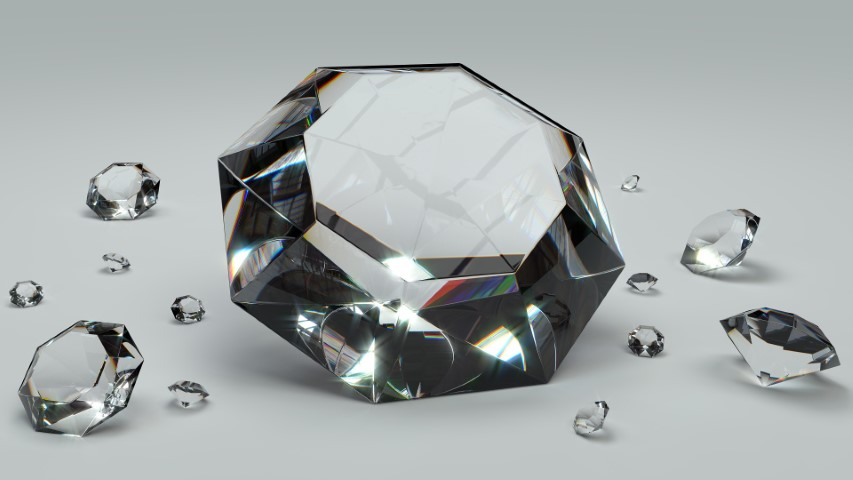

Bild von <a href="https://pixabay.com/de/users/colin00b-346653/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=1186139">Colin Behrens</a> auf <a href="https://pixabay.com/de//?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=1186139">Pixabay</a>

# **1 <font color='orange'>|</font> Understand**
***


<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Aufgabe verstehen</br>
✅ Daten sammeln</br>
✅ Statistische Analyse (Min, Max, Mean, Korrelation, ...)</br>
✅ Datenvisualisierung (Streudiagramm, Box-Plot, ...)</br>
✅ Prepare Schritte festlegen</br>

<p><font color='black' size="5">
Warnungen ausstellen
</font></p>

In [1]:
import warnings
warnings.filterwarnings('ignore')

<p><font color='black' size="5">
Anwendungsfall
</font></p>

---

Dieser klassische Datensatz enthält die Preise und andere Attribute von fast 54.000 Diamanten.



[DataSet](https://www.openml.org/search?type=data&status=active&id=42225)

[Info](https://www.kaggle.com/datasets/shivam2503/diamonds)


In [2]:
data_id = 42225
import pandas as pd
from sklearn.datasets import fetch_openml
df = fetch_openml(parser='auto', data_id=data_id)

In [3]:
label = 'price'
features = [n for n in df.frame.columns if n != label]

target = df.frame[label].copy()
data = df.frame[features].copy()

<p><font color='black' size="5">
EDA (Exploratory Data Analysis) mit Pandas
</font></p>

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   x        53940 non-null  float64 
 7   y        53940 non-null  float64 
 8   z        53940 non-null  float64 
dtypes: category(3), float64(6)
memory usage: 2.6 MB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [6]:
data.groupby('cut').count()

,carat,color,clarity,depth,table,x,y,z
cut,,,,,,,,
Very Good,12082,12082,12082,12082,12082,12082,12082,12082
Fair,1610,1610,1610,1610,1610,1610,1610,1610
Good,4906,4906,4906,4906,4906,4906,4906,4906
Ideal,21551,21551,21551,21551,21551,21551,21551,21551
Premium,13791,13791,13791,13791,13791,13791,13791,13791


In [7]:
data.groupby('color').count()

,carat,cut,clarity,depth,table,x,y,z
color,,,,,,,,
D,6775,6775,6775,6775,6775,6775,6775,6775
E,9797,9797,9797,9797,9797,9797,9797,9797
F,9542,9542,9542,9542,9542,9542,9542,9542
G,11292,11292,11292,11292,11292,11292,11292,11292
H,8304,8304,8304,8304,8304,8304,8304,8304
I,5422,5422,5422,5422,5422,5422,5422,5422
J,2808,2808,2808,2808,2808,2808,2808,2808


<p><font color='black' size="5">
EDA (Exploratory Data Analysis) mit Plotly
</font></p>

In [8]:
import plotly.express as px
import plotly.subplots as sp

In [9]:
title_ = 'Depth'
b1 = px.box(data['depth'], title=title_, width=600, height=600)

title_ = 'Carat'
b2 = px.box(data['carat'], title=title_, width=600, height=600)

title_ = 'Table'
b3 = px.box(data['table'], title=title_, width=600, height=600)

fig = sp.make_subplots(rows=1, cols=3, subplot_titles=('Depth', 'Carat', 'Table'))

for trace in b1.data:
    fig.add_trace(trace, row=1, col=1)

for trace in b2.data:
    fig.add_trace(trace, row=1, col=2)

for trace in b3.data:
    fig.add_trace(trace, row=1, col=3)

# Layout anpassen
fig.update_layout(width=1000, height=500, title_text='Box-Plots')

# Plot anzeigen
fig.show()

Output hidden; open in https://colab.research.google.com to view.

# **2 <font color='orange'>|</font>  Prepare**

---

<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Nicht benötigte Features löschen</br>
✅ Datentyp ermitteln/ändern</br>
✅ Duplikate ermitteln/löschen</br>
✅ Missing Values behandeln</br>
✅ Ausreißer behandeln</br>
✅ Kategorischer Features codieren</br>
✅ Numerischer Features skalieren</br>
✅ Dimensionalität reduzieren</br>
✅ Datensampling (Over-/Undersampling)</br>
✅ Feature-Engineering (neue Features schaffen)</br>
✅ Pipeline erstellen/konfigurieren</br>

<p><font color='black' size="5">
Datentyp ermitteln
</font></p>

In [10]:
all_col = data.columns
num_col = data.select_dtypes(include='number').columns
cat_col = data.select_dtypes(exclude='number').columns

<p><font color='black' size="5">
Duplikate ermitteln
</font></p>

In [11]:
duplicates = data[data.duplicated()]
print("Anzahl Duplicate: ", len(duplicates))
# print("Duplizierte Einträge:")
# print(duplicates)

Anzahl Duplicate:  345


In [12]:
duplicates = df.frame[df.frame.duplicated()]
print("Anzahl Duplicate: ", len(duplicates))
# print("Duplizierte Einträge:")
# print(duplicates)

Anzahl Duplicate:  146


<p><font color='black' size="5">
Duplikate löschen
</font></p>

In [13]:
col_names = data.columns

In [14]:
df.frame.drop_duplicates(subset=col_names, inplace=True)

In [15]:
target = df.frame[label].copy()
data = df.frame[features].copy()

<p><font color='black' size="5">
Codierung
</font></p>

In [16]:
from sklearn.preprocessing import OrdinalEncoder
cat_seq = [['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'],['J', 'I', 'H', 'G', 'F', 'E', 'D'], ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']]
data[cat_col] = OrdinalEncoder(categories=cat_seq).fit_transform(data[cat_col])

# **3 <font color='orange'>|</font>  Modeling**
---

<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Train-Test-Split erstellen</br>
✅ Modellauswahl treffen</br>
✅ Pipeline erweitern/konfigurieren</br>
✅ Training durchführen</br>

<p><font color='black' size="5">
Train-Test-Set
</font></p>


In [17]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.3, random_state=42)
data_train.shape, data_test.shape, target_train.shape, target_test.shape

((37516, 9), (16079, 9), (37516,), (16079,))

 <p><font color='black' size="5">
Modellauswahl & Training
</font></p>

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(data_train, target_train)

LinearRegression()

# **4 <font color='orange'>|</font> Evaluate**
---


<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Prognose (Train, Test) erstellen</br>
✅ Modellgüte prüfen</br>
✅ Residuenanalyse erstellen</br>
✅ Feature Importance/Selektion prüfen</br>
✅ Robustheitstest erstellen</br>
✅ Modellinterpretation erstellen</br>
✅ Sensitivitätsanalyse erstellen</br>
✅ Kommunikation (Key Takeaways)</br>


<p><font color='black' size="5">
Prediction
</font></p>


In [19]:
target_train_pred = model.predict(data_train)
target_test_pred = model.predict(data_test)

<p><font color='black' size="5">
Bestimmtheitsmass
</font></p>

In [20]:
from sklearn.metrics import r2_score
r2 = r2_score(target_train, target_train_pred)
print(f'Modell: {model} -- Train --- Bestimmtheitsmass: {r2:5.2f}' )

Modell: LinearRegression() -- Train --- Bestimmtheitsmass:  0.91


In [21]:
r2 = r2_score(target_test, target_test_pred)
print(f'Modell: {model} -- Test --- Bestimmtheitsmass: {r2:5.2f}' )

Modell: LinearRegression() -- Test --- Bestimmtheitsmass:  0.91


<p><font color='black' size="5">
Mean Absolut Error
</font></p>

In [22]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(target_test, target_test_pred)
print(f'Modell: {model} -- Test -- Mean Absolute Error: {mae:5.2f}' )

Modell: LinearRegression() -- Test -- Mean Absolute Error: 797.83


<p><font color='black' size="5">
Regressionskoeffizienten
</font></p>

In [23]:
print("Parameter der Regressionsgeraden:")
print('Ursprung: %10.2f' %float(model.intercept_))
anzahl = len(model.coef_)
print(f'Steigung der {anzahl} Merkmale: \n ', model.coef_)

Parameter der Regressionsgeraden:
Ursprung:    4282.01
Steigung der 9 Merkmale: 
  [10880.44481038   113.45633939   323.06381903   501.66168763
   -83.77884022   -28.16127728  -912.50023904    18.48836088
   -19.92439058]


<p><font color='black' size="5">
Aufbau Analysewürfel
</font></p>

In [24]:
# Übernahme der Testdaten
cube = data_test.copy()
cube.reset_index(inplace=True)

# Übernahem Target real & predict
cube['real'] = pd.DataFrame(target_test.values, columns=['real'])
cube['predict'] = pd.DataFrame(target_test_pred, columns=['predict'])

# Erstellung 2D Features über Dimensionsreduktion PCA - unsupervised
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca = pca.fit_transform(data_test)
pca_df = pd.DataFrame(pca)

# Cube um pca erweitern
cube['PCA1'] = pca_df[0]
cube['PCA2'] = pca_df[1]

<p><font color='black' size="5">
Visualisierung real vs predict
</font></p>

In [25]:
import plotly.express as px
import plotly.subplots as sp

In [26]:
# Boxplot
title_ = 'Boxplot real vs predict'
px.box(cube[['real', 'predict']], title=title_, width=600, height=600)

In [27]:
# Histogramm
title_ = 'Histogramm real vs predict'
fig = px.histogram(cube, x=['real', 'predict'], nbins=10, title=title_)
fig.update_layout(barmode='group',bargap=0.1, width=600, height=600)
fig.show()

In [28]:
# 2 x Scatterplots
title_ = 'Streupunktdiagramm real'
img1 = px.scatter(cube, x='PCA1', y='PCA2', color='real', title=title_, width=600, height=600)

title_ = 'Streupunktdiagramm predict'
img2 = px.scatter(cube, x='PCA1', y='PCA2', color='predict', title=title_, width=600, height=600)

fig = sp.make_subplots(rows=1, cols=2, subplot_titles=('Scatterplot real', 'Scatterplot predict'))

for trace in img1.data:
    fig.add_trace(trace, row=1, col=1)

for trace in img2.data:
    fig.add_trace(trace, row=1, col=2)

# Layout anpassen
fig.update_layout(width=1000, height=500, title_text='Vergleich real vs predict')

# Plot anzeigen
fig.show()

<p><font color='black' size="5">
Fehlerhafte Vorhersagen
</font></p>

In [29]:
cube['abs_Abw%'] = abs((cube['real'] - cube['predict']) / cube['real'] *100)
%precision 3
cube.head(10).style.format("{:,.1f}")

,index,carat,cut,color,clarity,depth,table,x,y,z,real,predict,PCA1,PCA2,abs_Abw%
0,"9,272.0",1.0,1.0,5.0,2.0,64.5,56.0,6.2,6.3,4.0,"4,563.0","5,364.4",-0.7,-1.6,17.6
1,"53,442.0",0.9,2.0,6.0,0.0,63.0,58.0,6.1,6.2,3.9,"2,674.0","3,989.2",1.4,-0.5,49.2
2,"36,985.0",0.4,4.0,5.0,3.0,61.9,57.0,4.7,4.6,2.9,963.0,975.4,-1.4,1.6,1.3
3,"17,690.0",0.9,2.0,5.0,5.0,61.1,61.0,6.2,6.2,3.8,"7,131.0","6,041.9",2.9,2.6,15.3
4,"14,696.0",1.0,2.0,4.0,3.0,58.7,62.0,6.5,6.6,3.9,"5,929.0","5,627.7",5.0,2.1,5.1
5,"23,217.0",1.1,4.0,4.0,6.0,60.1,60.0,6.8,6.8,4.1,"11,226.0","8,565.9",1.9,1.8,23.7
6,"18,049.0",0.4,2.0,5.0,2.0,59.9,60.0,4.6,4.6,2.8,615.0,178.5,2.2,3.0,71.0
7,"53,000.0",0.7,4.0,4.0,2.0,61.4,57.0,5.7,5.7,3.5,"2,596.0","2,741.7",-0.3,-0.1,5.6
8,"48,378.0",0.6,4.0,5.0,4.0,61.4,57.0,5.3,5.4,3.3,"1,965.0","2,989.9",-1.2,1.4,52.2
9,"1,179.0",0.7,4.0,4.0,3.0,62.3,57.0,5.7,5.7,3.6,"2,930.0","3,276.6",-0.7,-0.1,11.8


In [30]:
cube.describe().T

,count,mean,std,min,25%,50%,75%,max
index,16079.0,2.693637e+04,15671.803961,1.000000,13327.500000,27013.000000,40600.500000,53936.000000
carat,16079.0,7.929834e-01,0.467290,0.200000,0.400000,0.700000,1.040000,5.010000
cut,16079.0,2.908763e+00,1.120025,0.000000,2.000000,3.000000,4.000000,4.000000
color,16079.0,3.417315e+00,1.697224,0.000000,2.000000,3.000000,5.000000,6.000000
clarity,16079.0,3.057093e+00,1.661630,0.000000,2.000000,3.000000,4.000000,7.000000
depth,16079.0,6.174327e+01,1.438668,43.000000,61.000000,61.800000,62.500000,73.600000
table,16079.0,5.744112e+01,2.252619,50.100000,56.000000,57.000000,59.000000,95.000000
x,16079.0,5.722964e+00,1.110059,0.000000,4.710000,5.700000,6.530000,10.740000
y,16079.0,5.725490e+00,1.102044,0.000000,4.720000,5.710000,6.530000,10.540000
z,16079.0,3.535380e+00,0.722017,0.000000,2.910000,3.520000,4.030000,31.800000


In [31]:
# Histogramm
title_ = 'Histogramm absolute Abweichung'
fig = px.histogram(cube, x=['abs_Abw%'], nbins=20, title=title_)
fig.update_layout(barmode='group',bargap=0.2, width=800, height=600)
fig.show()

<p><font color='black' size="5">
Feature Importance
</font></p>

In [33]:
from sklearn.feature_selection import f_regression
fscores, pvalues = f_regression(data_test, target_test)
for i in range(len(fscores)):
    print(f"Feature {i+1}: {data.columns[i]:10s} score = {fscores[i]:7.2f}, p-value = {pvalues[i]:.3f}")

Feature 1: carat      score = 88327.09, p-value = 0.000
Feature 2: cut        score =   56.76, p-value = 0.000
Feature 3: color      score =  438.59, p-value = 0.000
Feature 4: clarity    score =  350.92, p-value = 0.000
Feature 5: depth      score =    2.11, p-value = 0.146
Feature 6: table      score =  304.79, p-value = 0.000
Feature 7: x          score = 56910.98, p-value = 0.000
Feature 8: y          score = 57895.96, p-value = 0.000
Feature 9: z          score = 36381.08, p-value = 0.000


# **5 <font color='orange'>|</font> Deploy**
---

<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Modellexport und -speicherung</br>
✅ Abhängigkeiten und Umgebung</br>
✅ Sicherheit und Datenschutz</br>
✅ In die Produktion integrieren</br>
✅ Tests und Validierung</br>
✅ Dokumentation & Wartung</br>